In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [10]:
df=pd.read_csv('C:/Users/arnav/Desktop/Python_projects/EDA/Rainfall_prediction/guwahati_weather_1972_2024.csv')
print(df.head())
print(df.tail())

       name    datetime  ...                        year_source  source
0  guwahati  1973-01-01  ...  guwahati 1973-01-01 to 1973-12-31     NaN
1  guwahati  1973-01-02  ...  guwahati 1973-01-01 to 1973-12-31     NaN
2  guwahati  1973-01-03  ...  guwahati 1973-01-01 to 1973-12-31     NaN
3  guwahati  1973-01-04  ...  guwahati 1973-01-01 to 1973-12-31     NaN
4  guwahati  1973-01-05  ...  guwahati 1973-01-01 to 1973-12-31     NaN

[5 rows x 35 columns]
           name    datetime  ...                        year_source  source
19020  guwahati  2025-01-28  ...  guwahati 2024-01-01 to 2025-02-01     obs
19021  guwahati  2025-01-29  ...  guwahati 2024-01-01 to 2025-02-01     obs
19022  guwahati  2025-01-30  ...  guwahati 2024-01-01 to 2025-02-01     obs
19023  guwahati  2025-01-31  ...  guwahati 2024-01-01 to 2025-02-01     obs
19024  guwahati  2025-02-01  ...  guwahati 2024-01-01 to 2025-02-01     obs

[5 rows x 35 columns]


C:\Users\arnav\AppData\Local\Temp\ipykernel_17108\1161427255.py:1: DtypeWarning: Columns (34) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('C:/Users/arnav/Desktop/Python_projects/EDA/Rainfall_prediction/guwahati_weather_1972_2024.csv')


In [11]:
df_rel=df[['datetime','tempmax','tempmin','dew','humidity','precip','windspeed','sealevelpressure','cloudcover']]
df_rel.isnull().sum()

datetime             0
tempmax             46
tempmin             46
dew                 46
humidity            46
precip              47
windspeed            0
sealevelpressure    51
cloudcover          47
dtype: int64

In [12]:
df_rel=df_rel.dropna(subset=['precip'])
clean=['tempmax','tempmin','dew','humidity','sealevelpressure','cloudcover']
df_rel[clean]=df_rel[clean].interpolate(method='linear')
df_rel.isnull().sum()
df_rel.to_csv('guwahati_weather_1972_2025_clean.csv', index=False)



In [13]:
df_clean=pd.read_csv('C:/Users/arnav/Desktop/Python_projects/EDA/Rainfall_prediction/guwahati_weather_1972_2025_clean.csv')
df_clean.info()
df_clean.describe()
df_clean

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18978 entries, 0 to 18977
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   datetime          18978 non-null  object 
 1   tempmax           18978 non-null  float64
 2   tempmin           18978 non-null  float64
 3   dew               18978 non-null  float64
 4   humidity          18978 non-null  float64
 5   precip            18978 non-null  float64
 6   windspeed         18978 non-null  float64
 7   sealevelpressure  18978 non-null  float64
 8   cloudcover        18978 non-null  float64
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


,datetime,tempmax,tempmin,dew,humidity,precip,windspeed,sealevelpressure,cloudcover
0,1973-01-01,23.1,11.1,10.2,69.7,0.0,9.0,1015.0,5.5
1,1973-01-02,22.1,10.1,12.0,78.7,0.0,9.0,1014.2,0.9
2,1973-01-03,22.1,11.1,11.5,75.4,0.0,5.4,1013.4,26.1
3,1973-01-04,23.1,16.1,13.4,67.1,0.0,7.2,1014.3,40.0
4,1973-01-05,20.1,12.1,13.5,85.7,0.0,0.1,1016.2,30.0
...,...,...,...,...,...,...,...,...,...
18973,2025-01-28,23.8,14.5,15.3,81.1,0.0,8.5,1012.3,56.4
18974,2025-01-29,23.7,15.9,15.4,79.8,0.0,7.6,1014.6,56.8
18975,2025-01-30,23.6,13.4,13.8,78.9,0.0,9.9,1010.7,52.4
18976,2025-01-31,23.9,13.5,15.0,80.9,0.0,12.4,1011.1,55.8


In [14]:
df_clean['datetime'] = pd.to_datetime(df_clean['datetime'])
df_clean['year']=df_clean['datetime'].dt.year
df_clean['month']=df_clean['datetime'].dt.month
df_clean['day']=df_clean['datetime'].dt.day
df_clean.info()
df_clean['precip'].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18978 entries, 0 to 18977
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   datetime          18978 non-null  datetime64[ns]
 1   tempmax           18978 non-null  float64       
 2   tempmin           18978 non-null  float64       
 3   dew               18978 non-null  float64       
 4   humidity          18978 non-null  float64       
 5   precip            18978 non-null  float64       
 6   windspeed         18978 non-null  float64       
 7   sealevelpressure  18978 non-null  float64       
 8   cloudcover        18978 non-null  float64       
 9   year              18978 non-null  int32         
 10  month             18978 non-null  int32         
 11  day               18978 non-null  int32         
dtypes: datetime64[ns](1), float64(8), int32(3)
memory usage: 1.5 MB


count    18978.000000
mean         4.894762
std         14.772484
min          0.000000
25%          0.000000
50%          0.000000
75%          2.106000
max        387.800000
Name: precip, dtype: float64

<Axes: xlabel='precip', ylabel='Count'>

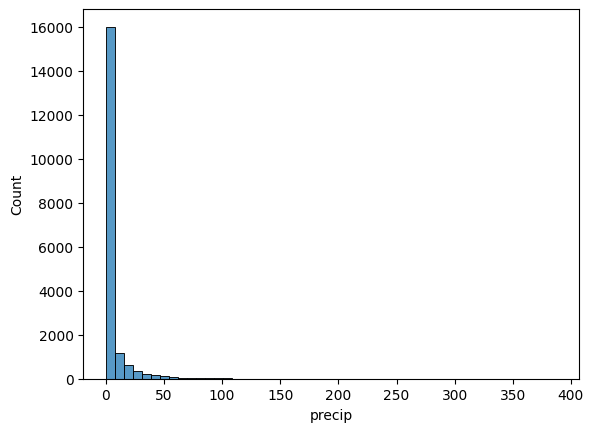

In [15]:
sns.histplot(df_clean['precip'],bins=50)

<Axes: xlabel='month', ylabel='precip'>

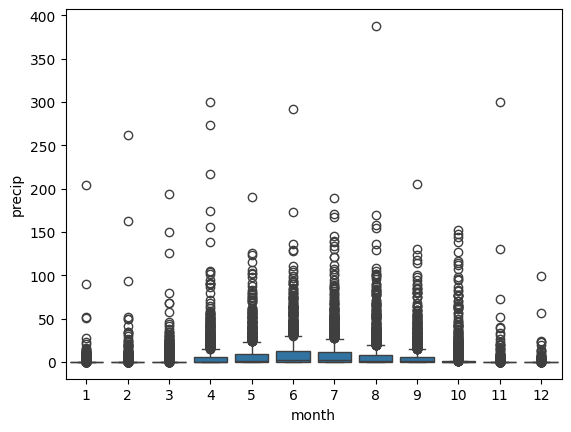

In [16]:
sns.boxplot(x='month',y='precip',data=df_clean)

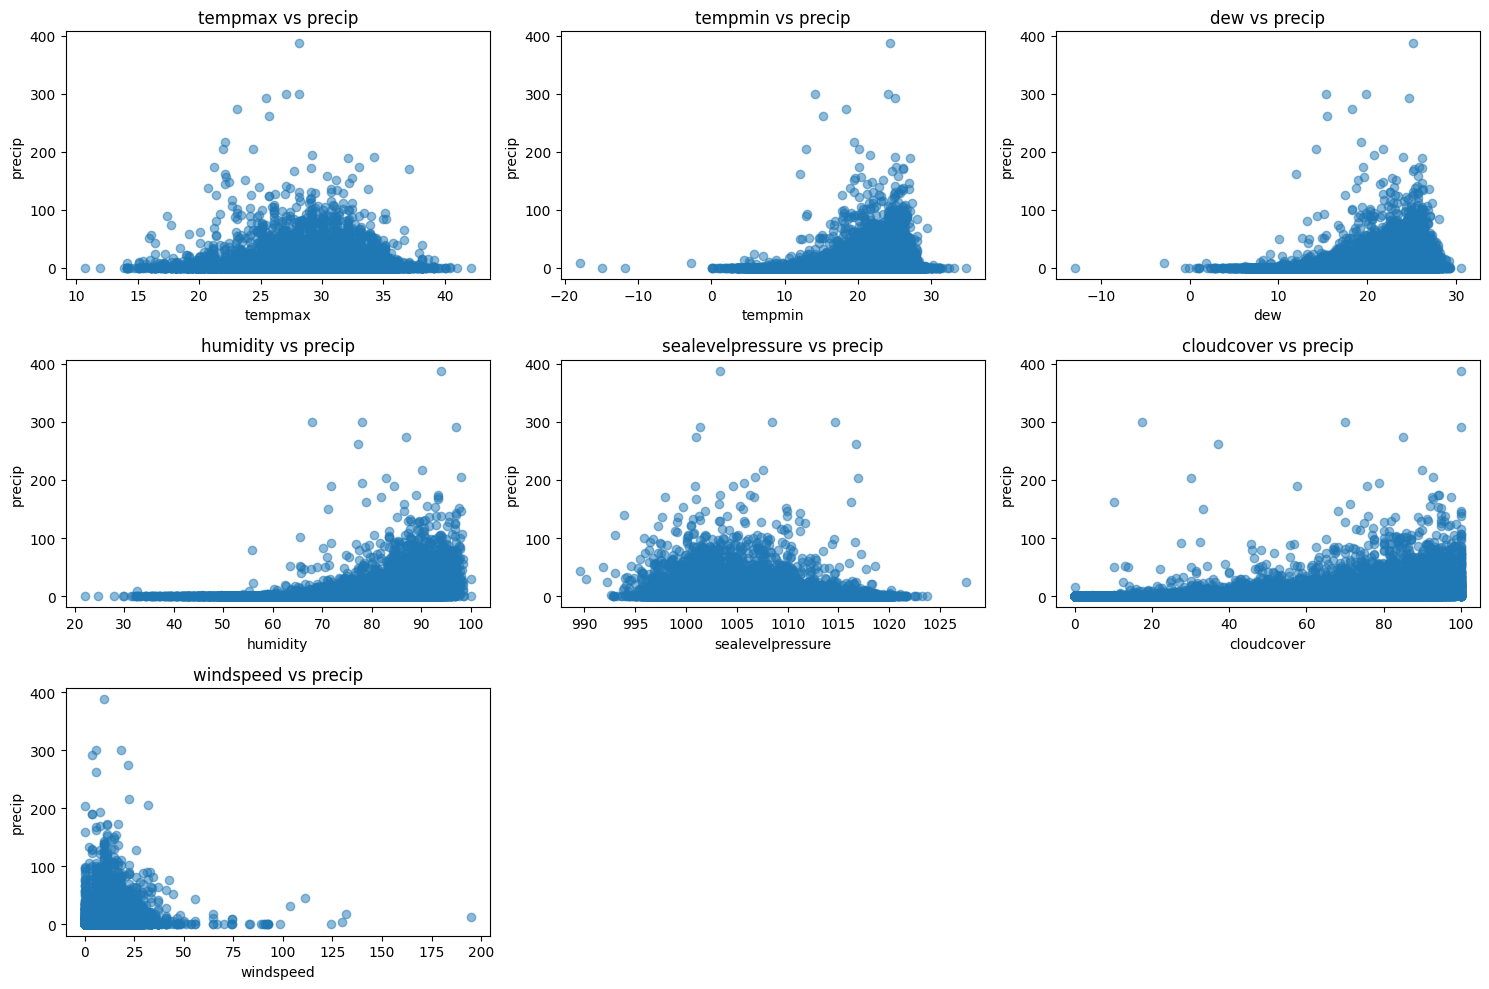

In [17]:
features = ['tempmax', 'tempmin', 'dew', 'humidity', 'sealevelpressure', 'cloudcover','windspeed']

# Create grid
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = axes.flatten()  # Flatten 2D grid to 1D array for easy iteration

# Plot each scatterplot
for i, feature in enumerate(features):
    axes[i].scatter(df_clean[feature], df_clean['precip'], alpha=0.5)
    axes[i].set_title(f'{feature} vs precip')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('precip')

for j in range(len(features), len(axes)):
    fig.delaxes(axes[j])
    
plt.tight_layout()
plt.show()


<Axes: >

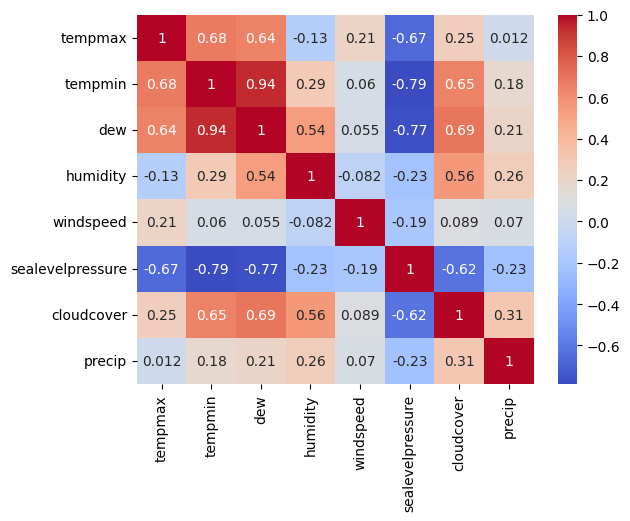

In [18]:
corr = df[['tempmax','tempmin','dew','humidity','windspeed','sealevelpressure','cloudcover','precip']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')


In [19]:
'''Suitable input features: tempmin,dew,humidity,sealevelpressure,cloudcover.
As tempmin and dew are strongly correlated(0.94), only tempmin is chosen.'''

'Suitable input features: tempmin,dew,humidity,sealevelpressure,cloudcover.\nAs tempmin and dew are strongly correlated(0.94), only tempmin is chosen.'

In [20]:
input_features= ['tempmin','humidity','sealevelpressure','cloudcover']
target='precip'
X=df_clean[input_features]
y=df_clean[target]


In [37]:
#use log-transform to handle skewed rainfall data
y_log=np.log1p(y)
#train test split
X_train,X_test,y_train,y_test=train_test_split(X,y_log,test_size=0.2,random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

model=LinearRegression()
model.fit(X_train_scaled,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [39]:
#predict and evaluate performance
y_pred_log=model.predict(X_test_scaled)

y_test_mm = np.expm1(y_test)          # inverse of log1p
y_pred_mm_lr = np.expm1(y_pred_log)

def print_reg_metrics(y_true_mm, y_pred_mm, label="Model"):
    r2 = r2_score(y_true_mm, y_pred_mm)
    mae = mean_absolute_error(y_true_mm, y_pred_mm)
    rmse = np.sqrt(mean_squared_error(y_true_mm, y_pred_mm))
    print(f"{label} — R2: {r2:.4f} | MAE: {mae:.4f} mm | RMSE: {rmse:.4f} mm")

print_reg_metrics(y_test_mm, y_pred_mm_lr, "LinearRegression")


LinearRegression — R2: 0.0301 | MAE: 4.7306 mm | RMSE: 15.0329 mm


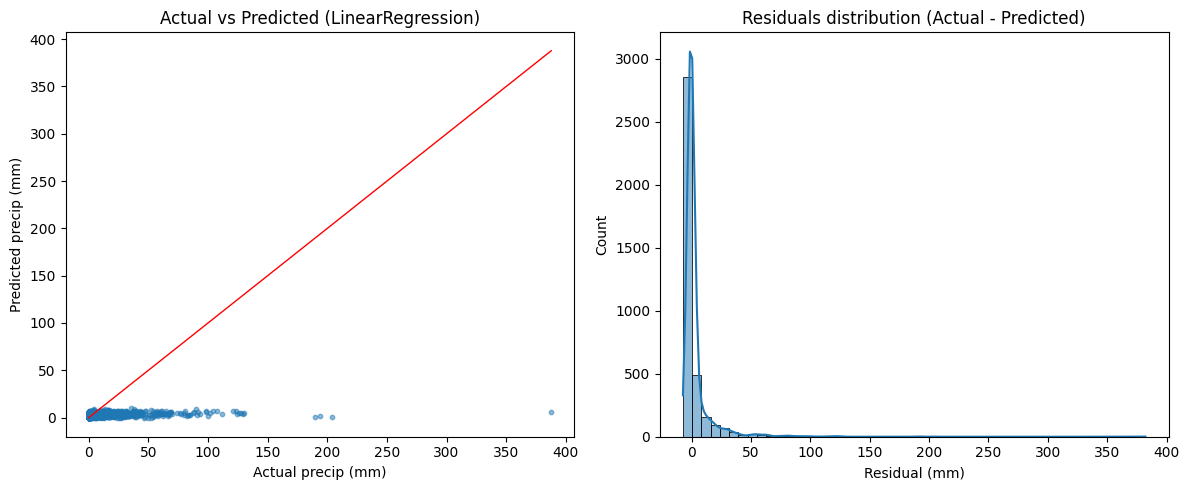

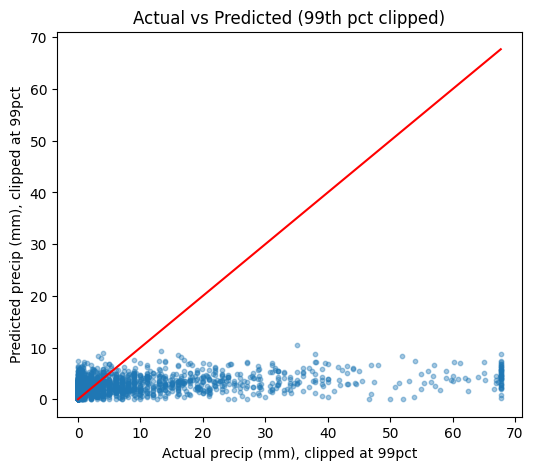

In [40]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.scatter(y_test_mm, y_pred_mm_lr, alpha=0.5, s=10)
plt.plot([0, max(y_test_mm.max(), y_pred_mm_lr.max())],
         [0, max(y_test_mm.max(), y_pred_mm_lr.max())],
         color='red', linewidth=1)
plt.xlabel("Actual precip (mm)")
plt.ylabel("Predicted precip (mm)")
plt.title("Actual vs Predicted (LinearRegression)")

plt.subplot(1,2,2)
residuals = y_test_mm - y_pred_mm_lr
sns.histplot(residuals, bins=50, kde=True)
plt.title("Residuals distribution (Actual - Predicted)")
plt.xlabel("Residual (mm)")
plt.tight_layout()
plt.show()

# Zoomed scatter (exclude extreme outliers) to inspect typical range
cap = np.percentile(y_test_mm, 99)   # 99th percentile cap
plt.figure(figsize=(6,5))
plt.scatter(np.clip(y_test_mm, 0, cap), np.clip(y_pred_mm_lr, 0, cap), alpha=0.4, s=10)
plt.plot([0, cap], [0, cap], color='red')
plt.xlabel("Actual precip (mm), clipped at 99pct")
plt.ylabel("Predicted precip (mm), clipped at 99pct")
plt.title("Actual vs Predicted (99th pct clipped)")
plt.show()